In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sn
import pandas as pd
import os 
from os.path import join
import glob
sn.set_context("talk")
import itertools
from matplotlib import gridspec

(24,)


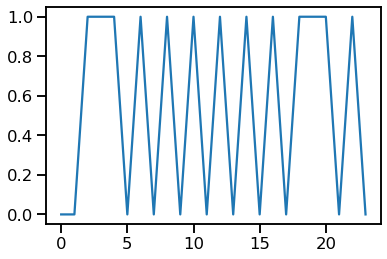

In [3]:
def generate_noise(maxn=18):
    """Generates dot and dash based noise."""
    
    threes = np.random.randint(int(.5*maxn), int(.75*maxn))
    ones = (maxn - threes) * 2
    noise = list(itertools.repeat([1,1,1,0], threes))
    noise[:int(len(noise)/3)] = list(itertools.repeat([0,0], int(len(noise)/3)))
    ones = ones + int(len(noise)/3)
    noise.extend(list(itertools.repeat([1,0], ones)))
    random.shuffle(noise)
    noise = np.concatenate(noise)
    return noise
noise = generate_noise(6)
print(noise.shape)
plt.plot(noise)

In [4]:
import torch
ttype = torch.cuda.FloatTensor
sig_lets = ["A","B","C","D","E","F","G","H",]

signals = ttype([[0,1,1,1,0,1,1,1,0,1,0,1,0,1,0,0,0],
                 [0,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0],
                 [0,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0],
                 [0,1,1,1,0,1,0,1,0,1,0,1,1,1,0,0,0],
                 [0,1,0,1,1,1,0,1,1,1,0,1,1,1,0,0,0],
                 [0,1,1,1,0,1,0,1,1,1,0,1,1,1,0,0,0],
                 [0,1,1,1,0,1,1,1,0,1,0,1,1,1,0,0,0],
                 [0,1,1,1,0,1,1,1,0,1,1,1,0,1,0,0,0]]
               ).view(8, 1, 1, -1)
#signals = ms
key2id = {k:i for i, k in enumerate(sig_lets)}

print(key2id)
torch.manual_seed(12345)
training_samples = 32
maxn=6
training_signals = []
training_class = []

for i, sig in enumerate(signals):
    temp_signals = []
    temp_class = []
    noise = ttype(generate_noise(maxn))
    temp = torch.cat([sig[0,0], noise]).unsqueeze(0)
    temp_signals.append(torch.zeros(temp.shape).cuda())

    while(any([(temp == c_).all() for c_ in temp_signals])):
        print('SHIT')
        noise = ttype(generate_noise(maxn))
        temp = torch.cat([sig[0,0], noise]).unsqueeze(0)
    temp_signals.append(temp)
    temp_signals.append(temp)
    temp_signals.append(temp)
    temp_signals.append(torch.zeros(temp.shape).cuda())
    temp_class.append(i)
    training_signals.extend(temp_signals)
    training_class.extend(temp_class)



training_signals = torch.cat(training_signals)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7}


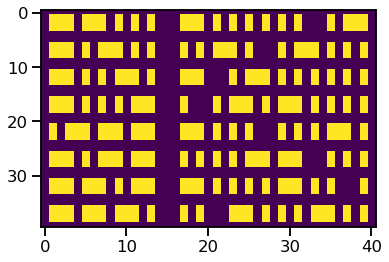

In [5]:
plt.imshow(training_signals.detach().cpu(), aspect='auto')
#plt.yticks(np.arange(.5, 8, 1), labels=[""]*8, minor=True);
#plt.axis(False)
plt.grid(False)

In [10]:
ss = 35
ms = 40
ls = 45
plt.rc('font', size=ss)
plt.rc('axes', titlesize=ss)
plt.rc('axes', labelsize=ss)
plt.rc('xtick', labelsize=ss)
plt.rc('ytick', labelsize=ss)
plt.rc('legend', fontsize=ss)
plt.rc('figure', titlesize=ss)

/home/bgj5hk/bin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:103: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


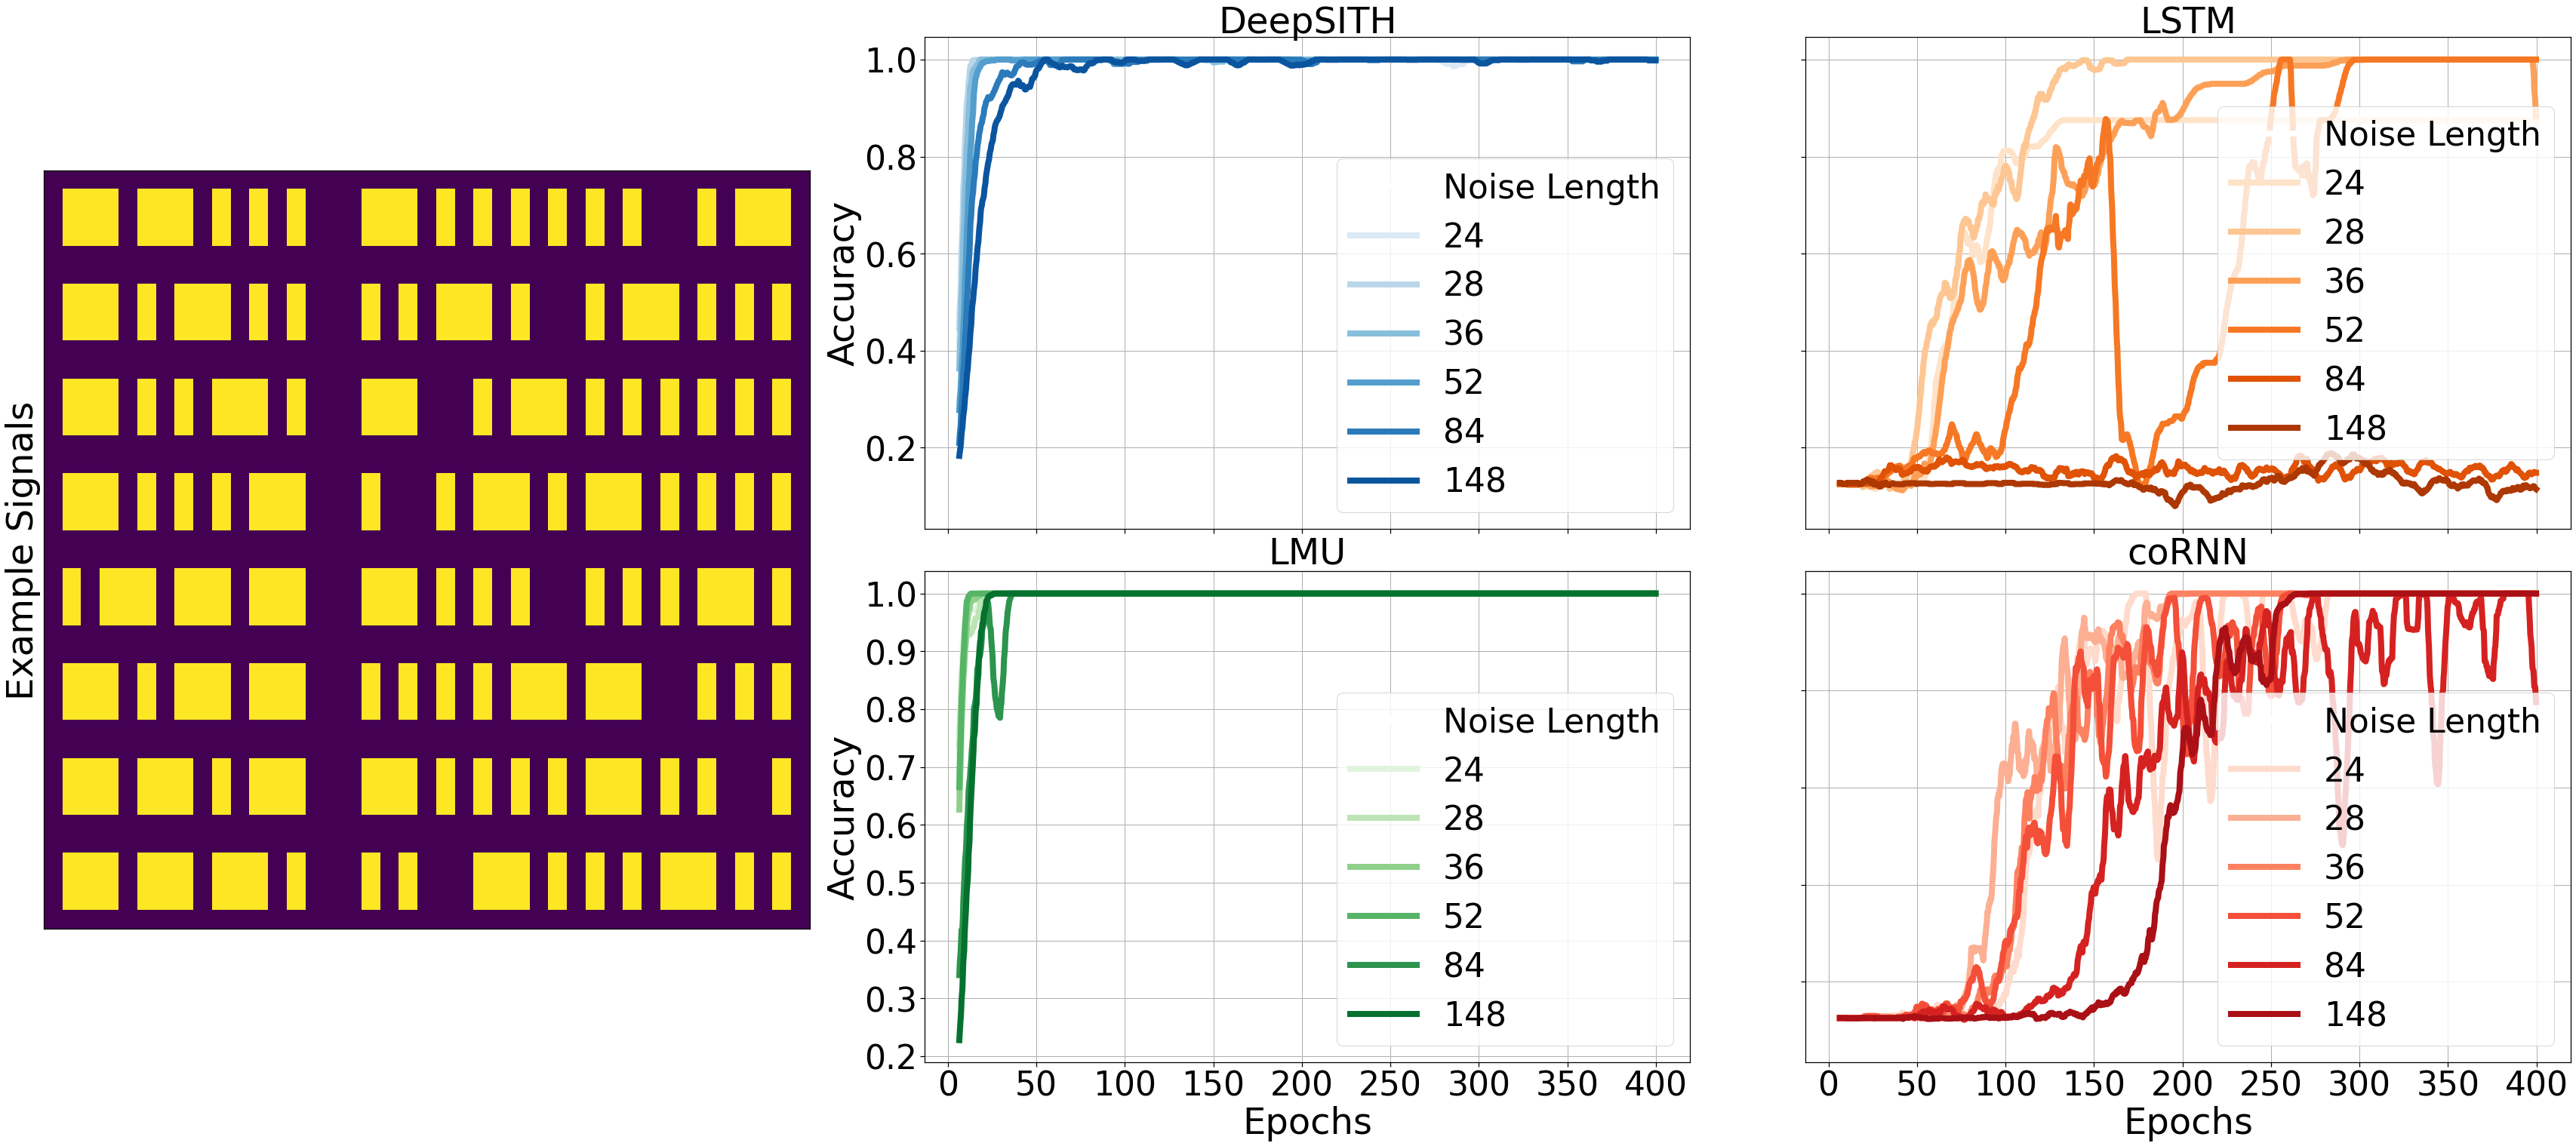

In [17]:
window_size = 20
with sn.plotting_context("notebook", font_scale=4):
    fig = plt.figure(figsize=(60,25), )
    spec = gridspec.GridSpec(nrows=8, ncols=3,wspace=.15,hspace=.47, figure=fig)
    
    dat = pd.read_csv('perf/h8_deepsith_length_9.csv')
    maxpres = 8*32 
    dat['Noise Length'] = dat.maxn*4
    dat['presnum_epoch'] = ((dat.batch_idx*32) + maxpres*dat.epoch)/maxpres
    dat2 = dat.rolling(window=window_size, on="Noise Length", min_periods=1).mean()
    dat2['presnum_epoch'] = dat.presnum_epoch
    dat2 = dat2[dat2.presnum_epoch >= 6.5]

    ax = fig.add_subplot(spec[:4, 1])
    sn.lineplot(data=dat2, y='last_test', x='presnum_epoch', hue='Noise Length',
               palette=sn.color_palette("Blues", 6), ax=ax, legend='full', linewidth=8)
    leg = plt.legend()
    for legobj in leg.legendHandles:
        legobj.set_linewidth(8.0)
    plt.setp(ax.get_xticklabels(), visible=False)
    ax.set_ylabel("Accuracy")
    ax.set_xlabel("")

    ax.set_title('DeepSITH')
    ax.grid(True)



    dat = pd.read_csv('perf/h8_lstm_length_0.csv')
    maxpres = 8*32 
    dat['Noise Length'] = dat.maxn*4
    dat['presnum_epoch'] = ((dat.batch_idx*32) + maxpres*dat.epoch)/maxpres
    dat2 = dat.rolling(window=window_size, on="Noise Length", min_periods=1).mean()
    dat2['presnum_epoch'] = dat.presnum_epoch
    dat2 = dat2[dat2.presnum_epoch >= 6.5]
    ax = fig.add_subplot(spec[:4, 2], sharey=ax)
    sn.lineplot(data=dat2, y='last_test', x='presnum_epoch', hue='Noise Length',
               palette=sn.color_palette("Oranges", 6), ax=ax, legend='full', linewidth=8)
    ax.set_ylabel("")
    ax.set_xlabel("")
    leg = plt.legend()
    for legobj in leg.legendHandles:
        legobj.set_linewidth(8.0)
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.set_title('LSTM')
    ax.grid(True)



    dat = pd.read_csv('perf/h8_LMU_length_6.csv')
    maxpres = 8*32 
    dat['Noise Length'] = dat.maxn*4
    dat['presnum_epoch'] = ((dat.batch_idx*32) + maxpres*dat.epoch)/maxpres
    dat2 = dat.rolling(window=window_size, on="Noise Length", min_periods=1).mean()
    dat2['presnum_epoch'] = dat.presnum_epoch
    dat2 = dat2[dat2.presnum_epoch >= 6.5]
    ax2 = fig.add_subplot(spec[4:8, 1], sharex=ax)

    sn.lineplot(data=dat2, y='last_test', x='presnum_epoch', hue='Noise Length',
               palette=sn.color_palette("Greens", 6), ax=ax2, legend='full', linewidth=8)
    leg = plt.legend()
    for legobj in leg.legendHandles:
        legobj.set_linewidth(8.0)
    ax2.set_title('LMU')
    ax2.set_ylabel("Accuracy")
    ax2.set_xlabel("Epochs")
    ax2.grid(True)



    dat = pd.read_csv('perf/h8_cornn_length_2.csv')
    maxpres = 8*32 
    dat['Noise Length'] = dat.maxn*4
    dat['presnum_epoch'] = ((dat.batch_idx*32) + maxpres*dat.epoch)/maxpres
    dat2 = dat.rolling(window=window_size, on="Noise Length", min_periods=1).mean()
    dat2['presnum_epoch'] = dat.presnum_epoch
    dat2 = dat2[dat2.presnum_epoch >= 6.5]

    ax = fig.add_subplot(spec[4:8, 2], sharey=ax, sharex=ax2)
    f = sn.lineplot(data=dat2, y='last_test', x='presnum_epoch', hue='Noise Length',
                    palette=sn.color_palette("Reds", 6), ax=ax, legend='full', linewidth=8)
    leg = plt.legend()
    for legobj in leg.legendHandles:
        legobj.set_linewidth(8.0)
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.set_ylabel("")

    ax.set_xlabel("Epochs")



    ax.set_title('coRNN')
    ax.grid(True)

    ax = fig.add_subplot(spec[1:7, 0])
    ax.imshow(training_signals.detach().cpu(), aspect='auto')
    
    #for i in range(8):
    #    ax.step(np.arange(89), training_signals[i].detach().cpu() + i*1.1)
    #ax.plot(training_signals[i].detach().cpu() + 1.1)
    ax.axes.get_xaxis().set_visible(False)
    ax.set_yticks([],[])
    ax.set_ylabel('Example Signals')
    plt.savefig('H8_test.pdf',
                #bbox='tight',
                edgecolor=fig.get_edgecolor(),
                facecolor=fig.get_facecolor(),
                dpi=150
                )

    plt.savefig('H8_test.svg',
                #bbox='tight',
                edgecolor=fig.get_edgecolor(),
                facecolor=fig.get_facecolor(),
                dpi=150
                )